In [30]:
# Fetch the data and take a peek
import pandas as pd, matplotlib.pyplot as plt, math

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/accidents2020.xlsx')

print('Rows: ' + str(df.shape[0]))
print('Cols: ' + str(df.shape[1]))
df.head()

Rows: 11335
Cols: 106


,Onnett_id,Tienpit,Tienpitsel,Tie,Aosa,Aet,Ajr,Vuosi,Kk,Päivä,...,Päällksel,Nakos150,Nakos300,Nakos460,Runkotie,Alkoholi,Järjnro,Jutuntunn,Raskos,Solmunro
0,9774697,1,Väylävirasto,1.0,3.0,29.0,2.0,2020,6,2020-06-09,...,kovat asfaltit,97.0,76.0,57.0,1.0,1,40361,R,ei,10407.0
1,9933667,1,Väylävirasto,1.0,3.0,3356.0,2.0,2020,10,2020-10-24,...,kovat asfaltit,97.0,76.0,57.0,1.0,1,48795,R,ei,10433.0
2,9665446,1,Väylävirasto,1.0,4.0,162.0,1.0,2020,3,2020-03-17,...,kovat asfaltit,100.0,97.0,70.0,1.0,0,14954,R,ei,NaN
3,9621851,1,Väylävirasto,1.0,4.0,1634.0,2.0,2020,1,2020-01-20,...,kovat asfaltit,100.0,97.0,70.0,1.0,0,3661,R,ei,NaN
4,9710570,1,Väylävirasto,1.0,4.0,2167.0,2.0,2020,4,2020-04-11,...,kovat asfaltit,100.0,97.0,70.0,1.0,1,19270,R,ei,12493.0


In [25]:
# As it's a good bunch of attributes, let's store the names in a separate list for easier reference
names = df.keys()

# Separate lists for numeric categories with corresponding descriptor (catn) and the descriptors (cats)
cats = names[names.str.endswith('sel')]
catn = names[names.str.startswith(tuple(cats.str.extract(r'\b(\w+)(sel)$')[0])) & ~names.str.endswith('sel')]


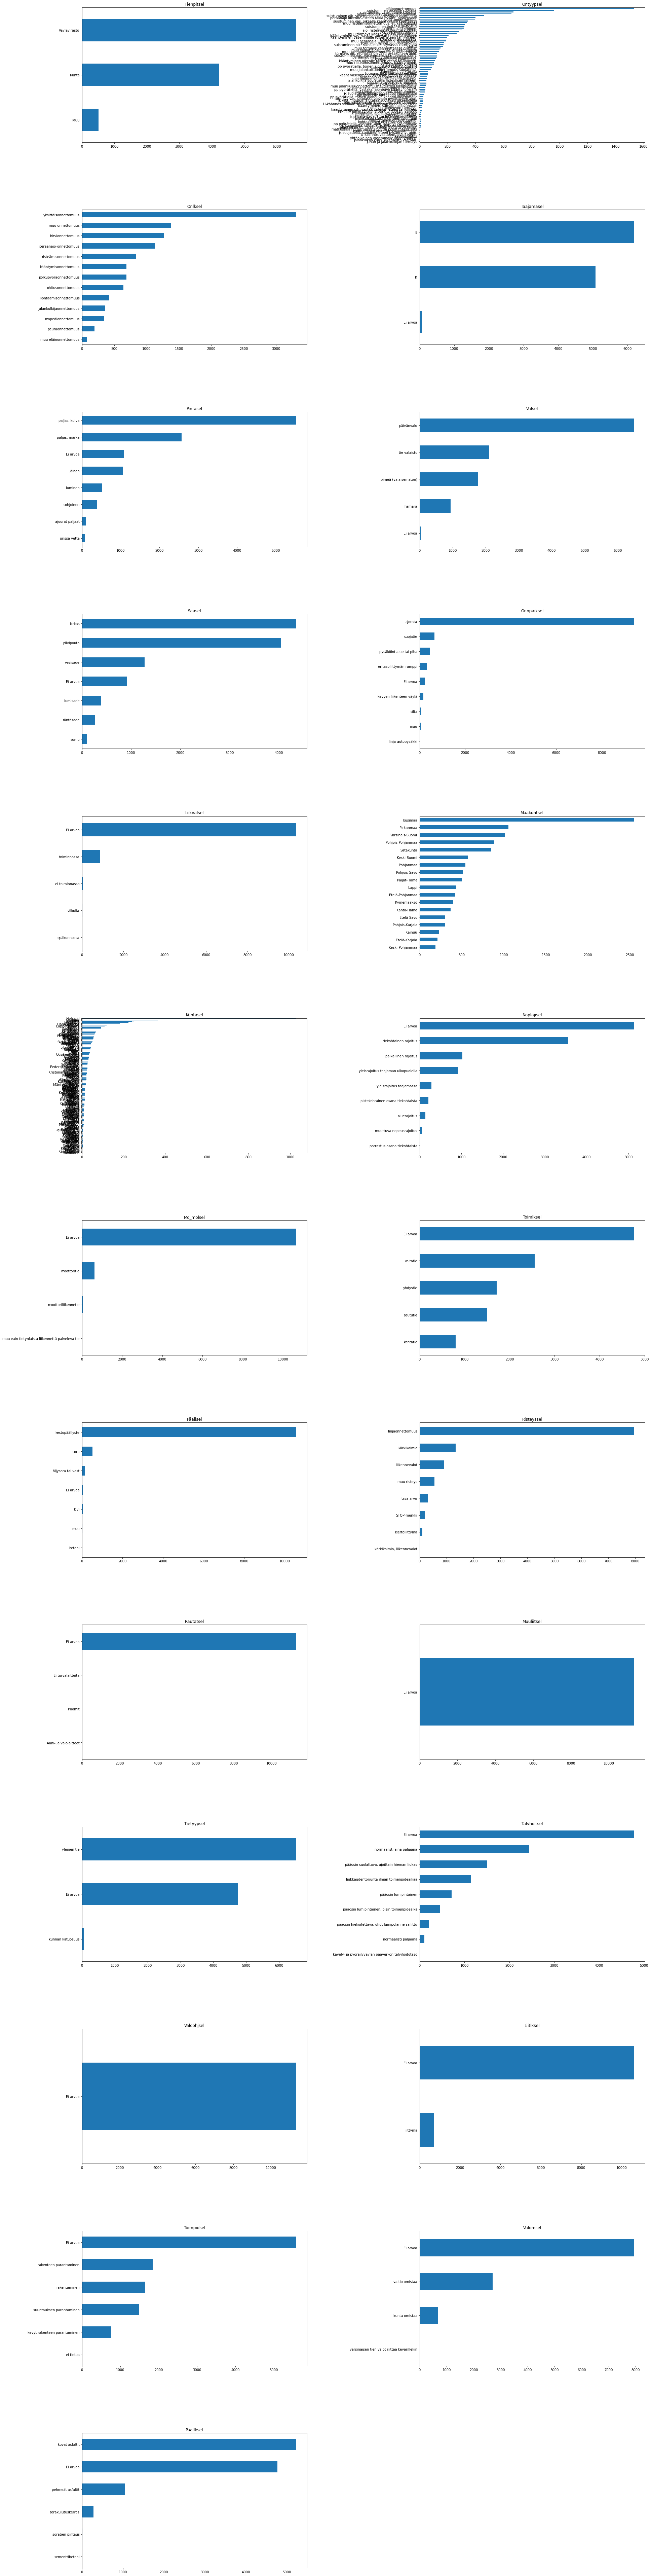

In [35]:
# Lets draw a bunch of barcharts over the categories to get ideas where to dig deeper

# How many subplots to draw size-by-size
ncols = 2

# Define a big drawing board for plots
fig = plt.figure(figsize=(30, 140))

# Add some space between subplots
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

# Iterate trough all categorical variables, and draw barcharts for each category with levels sorted by the number of occurences
for i, c in enumerate(cats):
     # Sorted counts for category levels
     levels = df[c].value_counts().sort_values()

     ax = fig.add_subplot(
          math.ceil(len(cats) / ncols), ncols   # Figure out a proper grid size,
          , i+1                              # tell the subplot its place on the grid
          , title=c                          # and title accordingly.
          )
     levels.plot.barh(ax=ax)                 # Draw a barchart from value counts and place it to the newly created subplot